Position024


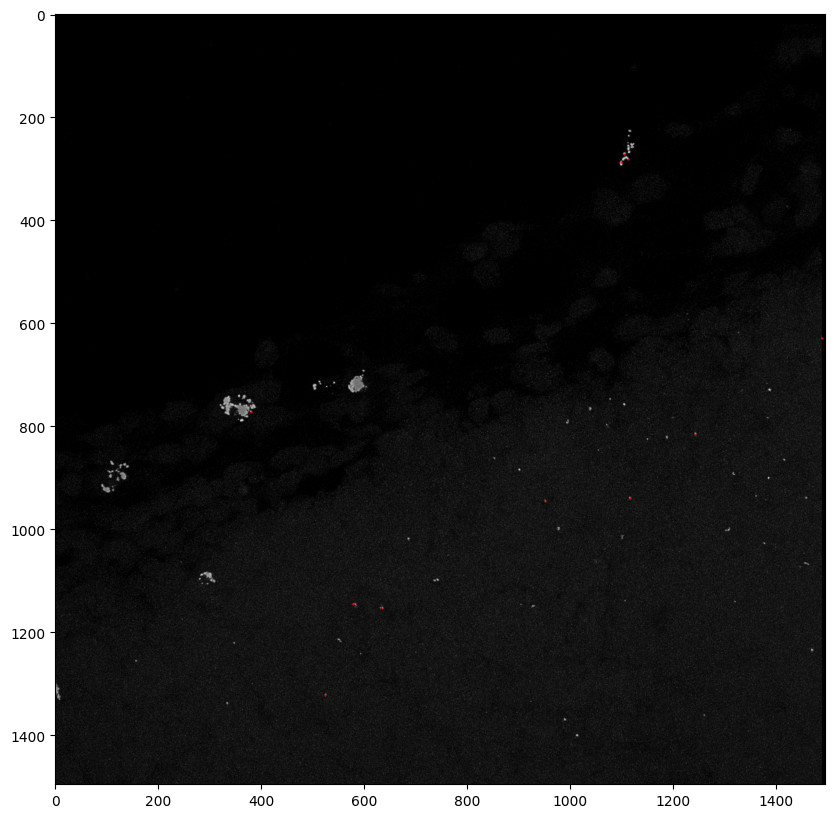

In [50]:
#!/usr/bin/env python
# coding: utf-8

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tifffile import imread
from skimage.feature import peak_local_max
from skimage.morphology import white_tophat, ball, disk, remove_small_objects
from skimage.measure import regionprops
from skimage.segmentation import expand_labels
from skimage.color import label2rgb
from anndata import AnnData
from skimage import img_as_float

current_id = 24
# current_id = int(sys.argv[1])
current_fov_id = f"Position{current_id:03}"
print(current_fov_id)

sample_dict = {}
for i in range(1, 64 + 1):
    sample_dict[f"Position{i:03}"] = "sample1"

for i in range(65, 132 + 1):
    sample_dict[f"Position{i:03}"] = "sample2"

for i in range(133, 189 + 1):
    sample_dict[f"Position{i:03}"] = "sample3"

for i in range(190, 245 + 1):
    sample_dict[f"Position{i:03}"] = "sample4"

for i in range(246, 289 + 1):
    sample_dict[f"Position{i:03}"] = "sample5"

for i in range(290, 331 + 1):
    sample_dict[f"Position{i:03}"] = "sample6"

for i in range(332, 353 + 1):
    sample_dict[f"Position{i:03}"] = "sample7"

for i in range(354, 388 + 1):
    sample_dict[f"Position{i:03}"] = "sample8"

for i in range(389, 415 + 1):
    sample_dict[f"Position{i:03}"] = "sample9"

for i in range(416, 471 + 1):
    sample_dict[f"Position{i:03}"] = "sample10"

for i in range(472, 521 + 1):
    sample_dict[f"Position{i:03}"] = "sample11"

for i in range(522, 550 + 1):
    sample_dict[f"Position{i:03}"] = "sample12"

# get sample id
current_sample = sample_dict[current_fov_id]

# set path
# base_path = '/stanley/WangLab/Data/Analyzed/2024-03-08-Hongyu-Covid_LN/'
base_path = 'Z:/Data/Analyzed/2024-03-08-Hongyu-Covid_LN/'
image_path = os.path.join(base_path, 'images')
signal_path = os.path.join(base_path, 'signal')
output_path = os.path.join(base_path, 'output')
expr_path = os.path.join(base_path, 'expr')
if not os.path.exists(expr_path):
    os.mkdir(expr_path)

# load tile_config
tile_config_df = pd.read_csv(os.path.join(output_path, f'tile_config_{current_sample}.csv'), index_col=0)
current_record = tile_config_df[tile_config_df['id'] == int(current_id)]
current_record = current_record.iloc[0]

# reads assignment
current_expr_path = os.path.join(expr_path, current_fov_id)
if not os.path.exists(current_expr_path):
    os.mkdir(current_expr_path)

# Load images
current_rbd_img = imread(os.path.join(image_path, "flamingo", 'RBD', f"{current_fov_id}.tif"))
current_gray_max = np.max((current_rbd_img), axis=0)
current_label_img = imread(os.path.join(image_path, "flamingo", 'stardist_segmentation', f"{current_fov_id}.tif"))

# Segmentation dialation
for z in range(current_label_img.shape[0]):
    current_label_img[z,:,:] = expand_labels(current_label_img[z,:,:], distance=5)
    # current_rbd_img[z,:,:] = white_tophat(current_rbd_img[z,:,:], disk(1))
    current_rbd_img[z,:,:] = remove_small_objects(current_rbd_img[z,:,:], 20)
    
# Find signal 
# footprint = ball(2)
# current_rbd_img = white_tophat(current_rbd_img, footprint)
points = peak_local_max(current_rbd_img, min_distance=3, threshold_abs=100)

# Reads assignment to cell
reads_df = pd.DataFrame(points, columns=['z', 'y', 'x'])
reads_assignment = current_label_img[points[:, 0], points[:, 1], points[:, 2]]
reads_df['seg_label'] = reads_assignment
reads_df['sample'] = current_sample
reads_df['fov_id'] = current_fov_id
reads_df['unique_index'] = reads_df['sample'].astype(str) + '_' + reads_df['fov_id'].astype(str) + '_' +  reads_df['seg_label'].astype(str)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(current_gray_max, cmap='gray')
ax.plot(points[:, 2], points[:, 1], 'r.', markersize=1)
# plt.savefig(os.path.join(current_expr_path, f"RBD.png"))
plt.show()

# reads assignment
# reads_df.to_csv(os.path.join(current_expr_path, "RBD_signal.csv"), index=False)

In [51]:
from skimage.morphology import white_tophat, ball, disk, remove_small_objects

In [63]:
remove_small_objects(a)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [11, 21, 25, ...,  0,  0,  0],
       [10, 24, 25, ...,  0,  0,  0],
       [23, 19, 16, ...,  0,  0,  0]], dtype=uint8)

In [64]:
a

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [11, 21, 25, ...,  0,  0,  0],
       [10, 24, 25, ...,  0,  0,  0],
       [23, 19, 16, ...,  0,  0,  0]], dtype=uint8)

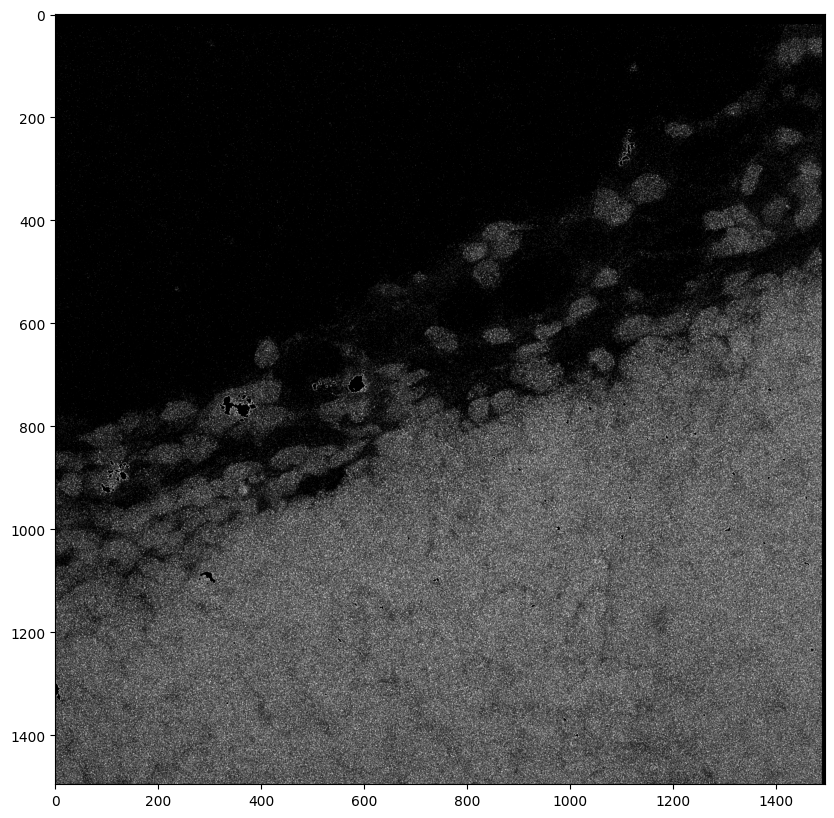

In [69]:
a = current_gray_max

fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(a, cmap='gray')
ax.imshow(remove_small_objects(a, 500), cmap='gray')
plt.show()